In [136]:
import base64
import requests


def run(fname, app_id, app_code):

    inputdata = open(fname,"rb").read()
    #print("inputdata.read:", inputdata)
    inputdata = base64.b64encode(inputdata)
    #print("b64encoded inputdata:", inputdata)

    url = "https://rme.api.here.com/2/matchroute.json"
    params = {
        "app_id": app_id,
        "app_code": app_code,
        "routemode": "car",
        "file": inputdata
    }

    result = requests.get(url=url, params=params)

    content = result.json()
    #print("content:", content)

    routes, traces, linkmap = extract_matched_info(content)

    #print(routes)

    #for t in traces: print(t)
    
    linkmapitems = []
    #for k, v in linkmap.items(): print(k,",",v[1])
    for k, v in linkmap.items():
        linkmapitems.append((k,v[1]))
    
    importantsoftraces = []
    
    for t in traces:
        t = (t[2],t[5])
        importantsoftraces.append(t)
    

    return routes, importantsoftraces, linkmapitems


def extract_matched_info(content):

    linkmap = {}
    routes = []
    for link in content["RouteLinks"]:
        linkId = link["linkId"]
        routes.append(linkId)
        length = float(link["linkLength"])
        fc = int(link["functionalClass"])
        shape = []
        shapes = link["shape"].strip().split(" ")
        nshapes = len(shapes)
        for i in range(0, nshapes, 2):
            shape.append((float(shapes[i]), float(shapes[i+1])))
        linkmap[linkId] = [fc, length, shape]
        #fc is unimportant, 
        
        #LENGTH is how long the link is
        
        #and shape is unimportant

    traces = []
    for trace in content["TracePoints"]:
        lat = float(trace["lat"])
        lon = float(trace["lon"])
        linkIdMatched = trace["linkIdMatched"]
        latMatched = float(trace["latMatched"])
        lonMatched = float(trace["lonMatched"])
        matchOffsetOnLink = float(trace["matchOffsetOnLink"])
        matchDistance = float(trace["matchDistance"])
        traces.append((lat, lon, linkIdMatched, latMatched, lonMatched, matchOffsetOnLink, matchDistance))
        #lat is original unimportant, lon is original unimportant, 
        
        #linkIdMatched is the linkId, 
        
        #latMatched is matched unimportant, lonMatched is matched unimportant
        
        #matchOffSetOnLink is the percent distance of the point within the link
        
        #matchDistance is unimportant

    return routes, traces, linkmap


In [225]:
fname = "3.9.2019.gpx"

# obtain app_id, app_code from developer.here.com
app_id = "gtswh2sa822DHthznV1X"
app_code = "zd2FnIRxq25-BNHJSqgjtg"

datae = run(fname, app_id, app_code)

#To create a list of all the linkIds
for poslink in datae[0]:
    placeholder = poslink
    poslink = []
    poslink.append(placeholder)
    poslink.append([])
    if poslink not in linkIdlist:
        linkIdlist.append(poslink)

In [218]:
#Only to reset
linkIdlist = []

In [230]:
#so that linkIdlist doesn't reset when soemthing needs to be done to linkIdList
linkIdList = linkIdlist

In [241]:
fname = "3.9.2019.gpx"

# obtain app_id, app_code from developer.here.com
app_id = "gtswh2sa822DHthznV1X"
app_code = "zd2FnIRxq25-BNHJSqgjtg"

datae = run(fname, app_id, app_code)



filename = "3.9.2019ForGPX.csv"
filehandler = open(filename,"r")
count = 0
spds = []
for line in filehandler:
    if count>=1:
        sploot = line.split(",") #splits the line 
        spd = sploot[2]
        spds.append(float(spd))
    count += 1
filehandler.close()


for i in range(len(datae[1])):
    datae[1][i] += (spds[i],)
    
    
    
for los in range(len(datae[1])):
    for i in range(len(datae[2])):
        if datae[1][los][0] == datae[2][i][0]:
            pointdistance = datae[1][los][1]*datae[2][i][1]
    pointinfo = [datae[1][los][0], datae[1][los][1], pointdistance, datae[1][los][2]]
    for links in linkIdList:
        if links[0] == pointinfo[0]:
            links[1].append(pointinfo)

In [248]:
for i in linkIdList:
    linksId = i[0]
    for totaldist in datae[2]:
        if linksId == totaldist[0]:
            i.append(totaldist[1])

In [247]:
linkIdlist

[[19773245,
  [[19773245, 0.8161010444553385, 94.22702659281339, 0.0],
   [19773245, 0.8161010444553385, 94.22702659281339, 0.0],
   [19773245, 0.8161010444553385, 94.22702659281339, 0.0],
   [19773245, 0.8162973121373738, 94.24968765938118, 0.0],
   [19773245, 0.8162973121373738, 94.24968765938118, 0.0],
   [19773245, 0.8258264213063293, 95.34991860402879, 0.0],
   [19773245, 0.8258264213063293, 95.34991860402879, 0.0],
   [19773245, 0.8258264213063293, 95.34991860402879, 0.0],
   [19773245, 0.8258264213063293, 95.34991860402879, 0.0],
   [19773245, 0.8258264213063293, 95.34991860402879, 0.0],
   [19773245, 0.8258264213063293, 95.34991860402879, 0.0],
   [19773245, 0.8258264213063293, 95.34991860402879, 0.0],
   [19773245, 0.8258264213063293, 95.34991860402879, 0.0],
   [19773245, 0.8258264213063293, 95.34991860402879, 0.0],
   [19773245, 0.8258264213063293, 95.34991860402879, 0.0],
   [19773245, 0.8258264213063293, 95.34991860402879, 0.0],
   [19773245, 0.8258264213063293, 95.3499186

In [202]:
datae

([19773245,
  -19773245,
  -27679562,
  19773261,
  941527792,
  1168356977,
  1168356978,
  -1168356980,
  1168356979,
  941527800,
  -941527799,
  1168356975,
  1168356976,
  1168356974,
  -1168356973,
  719458787,
  -719458786,
  -719458785,
  19773165,
  19773153,
  1168361024,
  1168361025,
  946067474,
  946067475,
  719458780,
  1168358411,
  1168358412,
  1168358410,
  1168358409,
  -1089013026,
  -1089013025,
  -1089013024,
  -1089013022,
  -1089016762,
  1089016761,
  -943431205,
  -943431204,
  -940792726,
  -940792725,
  -19773113,
  -27661514,
  940792724,
  -940792723,
  -19773121,
  -19773130,
  -19773145,
  -27661544,
  -27661545,
  -125168513,
  -125168512,
  -19773168],
 [(19773245, 0.8161010444553385, 0.0),
  (19773245, 0.8161010444553385, 0.0),
  (19773245, 0.8161010444553385, 0.0),
  (19773245, 0.8162973121373738, 0.0),
  (19773245, 0.8162973121373738, 0.0),
  (19773245, 0.8258264213063293, 0.0),
  (19773245, 0.8258264213063293, 0.0),
  (19773245, 0.825826421306329

In [214]:
datae[1][los][1]*datae[2][i][1]

28.80236492579538

In [295]:
def Average(lst):
    if len(lst) != 0:
        theav = sum(lst) / len(lst)
    elif len(lst) == 0:
        theav = 0
    return theav


spdscoords = []
distcoords = []
disttrack = 0


for idb in linkIdList:
    zerotwo = []
    twofour = []
    foursix = []
    sixeight = []
    eightten = []
    
    if type(idb[1]) == int:
        zerotwo.append(0)
        twofour.append(0)
        foursix.append(0)
        sixeight.append(0)
        eightten.append(0)
    else:
        for cell in idb[1]:
            if 0 <= cell[1] <= 0.2:
                zerotwo.append(cell[3])
            elif 0.2 < cell[1] <= 0.4:
                twofour.append(cell[3])
            elif 0.4 < cell[1] <= 0.6:
                foursix.append(cell[3])
            elif 0.6 < cell[1] <= 0.8:
                sixeight.append(cell[3])
            elif 0.8 < cell[1] <= 1:
                eightten.append(cell[3])
            
    azerotwo = Average(zerotwo)
    atwofour = Average(twofour)
    afoursix = Average(foursix)
    asixeight = Average(sixeight)
    aeightten = Average(eightten)
    
    spdscoords.append(azerotwo)
    spdscoords.append(atwofour)
    spdscoords.append(afoursix)
    spdscoords.append(asixeight)
    spdscoords.append(aeightten)
    
    
    if idb[-1] == []:
        crd = 0
    elif idb[-1] == [[719458785, 0.48833078707688304, 36.35622709787394, 1.7], [719458785, 0.48833078707688304, 36.35622709787394, 1.7], [719458785, 0.48833078707688304, 36.35622709787394, 1.7], [719458785, 0.48833078707688304, 36.35622709787394, 1.7], [719458785, 0.48833078707688304, 36.35622709787394, 1.7], [719458785, 0.48833078707688304, 36.35622709787394, 1.7], [719458785, 0.48833078707688304, 36.35622709787394, 1.7], [719458785, 0.48833078707688304, 36.35622709787394, 1.7], [719458785, 0.49921515745014966, 37.16656847216365, 0.0], [719458785, 0.49921515745014966, 37.16656847216365, 0.0], [719458785, 0.49921515745014966, 37.16656847216365, 0.0], [719458785, 0.49921515745014966, 37.16656847216365, 0.0], [719458785, 0.49921515745014966, 37.16656847216365, 0.0], [719458785, 0.4992151693317054, 37.16656935674547, 0.0], [719458785, 0.4992151693317054, 37.16656935674547, 0.0], [719458785, 0.4992151693317054, 37.16656935674547, 0.0], [719458785, 0.4989909167215528, 37.14987374991961, 0.0], [719458785, 0.4989909167215528, 37.14987374991961, 0.0], [719458785, 0.4989909167215528, 37.14987374991961, 0.0], [719458785, 0.4989909167215528, 37.14987374991961, 0.0], [719458785, 0.4989909167215528, 37.14987374991961, 0.0], [719458785, 0.4989909167215528, 37.14987374991961, 0.0]]:
        crd = idb[-1][0][2] / idb[-1][0][1]
    else:
        crd = idb[-1]
    
    distcoords.append(crd*0.1 + disttrack)
    distcoords.append(crd*0.3 + disttrack)
    distcoords.append(crd*0.5 + disttrack)
    distcoords.append(crd*0.7 + disttrack)
    distcoords.append(crd*0.9 + disttrack)
    
    disttrack += crd

In [290]:
desbath = []
for i in linkIdList:
    if i[-1] == []:
        heck = 0
    elif i[-1] == [[719458785, 0.48833078707688304, 36.35622709787394, 1.7], [719458785, 0.48833078707688304, 36.35622709787394, 1.7], [719458785, 0.48833078707688304, 36.35622709787394, 1.7], [719458785, 0.48833078707688304, 36.35622709787394, 1.7], [719458785, 0.48833078707688304, 36.35622709787394, 1.7], [719458785, 0.48833078707688304, 36.35622709787394, 1.7], [719458785, 0.48833078707688304, 36.35622709787394, 1.7], [719458785, 0.48833078707688304, 36.35622709787394, 1.7], [719458785, 0.49921515745014966, 37.16656847216365, 0.0], [719458785, 0.49921515745014966, 37.16656847216365, 0.0], [719458785, 0.49921515745014966, 37.16656847216365, 0.0], [719458785, 0.49921515745014966, 37.16656847216365, 0.0], [719458785, 0.49921515745014966, 37.16656847216365, 0.0], [719458785, 0.4992151693317054, 37.16656935674547, 0.0], [719458785, 0.4992151693317054, 37.16656935674547, 0.0], [719458785, 0.4992151693317054, 37.16656935674547, 0.0], [719458785, 0.4989909167215528, 37.14987374991961, 0.0], [719458785, 0.4989909167215528, 37.14987374991961, 0.0], [719458785, 0.4989909167215528, 37.14987374991961, 0.0], [719458785, 0.4989909167215528, 37.14987374991961, 0.0], [719458785, 0.4989909167215528, 37.14987374991961, 0.0], [719458785, 0.4989909167215528, 37.14987374991961, 0.0]]:
        heck = 0
    else:
        heck = i[-1]
    desbath.append(heck)
print(desbath)

[115.46000000000001, 115.46000000000001, 105.75, 184.4, 23.16, 19.85, 19.85, 137.33, 45.49, 47.980000000000004, 56.26, 43.01, 23.990000000000002, 50.46, 68.66, 69.48, 139.79, 74.45, 73.31, 45.54, 57.76, 33.32, 36.65, 31.11, 53.32, 39.99, 38.88, 36.65, 62.2, 64.67, 98.48, 71.13, 89.33, 265.05, 364.15000000000003, 68.14, 24.490000000000002, 8.89, 58.92, 48.21, 16.580000000000002, 31.43, 55.74, 83.66, 60.09, 39.27, 92.73, 10.870000000000001, 4.69, 56.9, 56.65, 0, 0, 0, 184.4, 105.75]


In [302]:
spdscoords

[18.775,
 26.933333333333337,
 28.033333333333335,
 28.83333333333334,
 1.7071942446043162,
 14.82592592592593,
 24.31999999999999,
 24.905263157894737,
 17.063333333333343,
 2.309302325581396,
 10.512195121951217,
 27.41363636363635,
 30.750000000000007,
 26.468421052631584,
 16.89047619047619,
 27.755172413793108,
 42.98421052631579,
 47.96842105263156,
 10.710280373831772,
 3.3212692967409954,
 25.3,
 17.400000000000002,
 21.054545454545455,
 24.55,
 27.625,
 30.599999999999998,
 34.03333333333333,
 32.599999999999994,
 38.733333333333334,
 40.175000000000004,
 40.2,
 44.46666666666667,
 44.2,
 46.975,
 46.55,
 72.19999999999999,
 71.38888888888889,
 67.53636363636362,
 62.52,
 53.32307692307693,
 74.2,
 74.16666666666667,
 74.19999999999999,
 72.65,
 75.48571428571428,
 73.8,
 77.25999999999999,
 74.1,
 74.03333333333335,
 78.2,
 71.18,
 75.43333333333334,
 72.3,
 76.72,
 74.6,
 68.23333333333333,
 65.92,
 53.599999999999994,
 58.05,
 40.028571428571425,
 76.5,
 26.250000000000004,

In [303]:
distcoords

[11.546000000000001,
 34.638,
 57.730000000000004,
 80.822,
 103.91400000000002,
 127.00600000000001,
 150.098,
 173.19,
 196.282,
 219.37400000000002,
 241.495,
 262.64500000000004,
 283.795,
 304.945,
 326.095,
 355.11,
 391.99,
 428.87,
 465.75,
 502.63,
 523.3860000000001,
 528.018,
 532.6500000000001,
 537.282,
 541.9140000000001,
 546.215,
 550.1850000000001,
 554.155,
 558.125,
 562.095,
 566.065,
 570.0350000000001,
 574.005,
 577.975,
 581.945,
 597.663,
 625.129,
 652.595,
 680.061,
 707.527,
 725.8090000000001,
 734.9070000000002,
 744.0050000000001,
 753.1030000000001,
 762.2010000000001,
 771.5480000000001,
 781.1440000000001,
 790.7400000000001,
 800.3360000000001,
 809.9320000000001,
 820.3560000000001,
 831.6080000000002,
 842.8600000000001,
 854.1120000000001,
 865.3640000000001,
 875.2910000000002,
 883.8930000000001,
 892.4950000000001,
 901.0970000000001,
 909.6990000000001,
 916.3990000000001,
 921.1970000000001,
 925.9950000000001,
 930.7930000000001,
 935.5910000

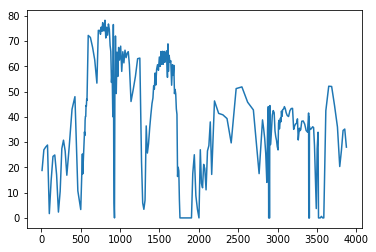

In [309]:
from matplotlib import pyplot as plt
plt.plot(distcoords, spdscoords)
plt.show()

In [ ]:
#failed attempt at getting the raw points for comparison's sake
rawspdscoords = []
rawdistcoords = []
rawdisttrack = 0


for idb in linkIdList:
    if type(idb[1]) == int:
        rawspdscoords.append(0)
    else:
        for cell in idb[1]:
            rawspdscoords.append(cell[3])
            rawdistcoords.append(cell[2] + rawdisttrack)
        
    rawdisttrack += idb[1][2][2] / idb[1][2][1]
        


In [1]:
linkIdList

NameError: name 'linkIdList' is not defined

In [ ]:
a = 1+1
print(a)